### Problem Overview

You are a vehicle exporter and you have the sales data with you.<br>
Below given are the questions needed for analysis.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Q1. Plot the distribution of Status of the Order.

In [3]:
vehicle_sales = pd.read_csv('vehicle_sales.csv')
vehicle_sales

,QUANTITYORDERED,SELLINGPRICE,SALES,ORDERDATE,STATUS,PRODUCTLINE,ACTUALPRICE,PRODUCTCODE,CUSTOMERNAME,CITY,COUNTRY,DEALSIZE
0,30,95.70,2871.00,2/24/2003 0:00,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,NYC,USA,Small
1,34,81.35,2765.90,5/7/2003 0:00,Shipped,Motorcycles,95,S10_1678,Reims Collectables,Reims,France,Small
2,41,94.74,3884.34,7/1/2003 0:00,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,Paris,France,Medium
3,45,83.26,3746.70,8/25/2003 0:00,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,Pasadena,USA,Medium
4,49,100.00,5205.27,10/10/2003 0:00,Shipped,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,San Francisco,USA,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...
2818,20,100.00,2244.40,12/2/2004 0:00,Shipped,Ships,54,S72_3212,Euro Shopping Channel,Madrid,Spain,Small
2819,29,100.00,3978.51,1/31/2005 0:00,Shipped,Ships,54,S72_3212,"Oulu Toy Supplies, Inc.",Oulu,Finland,Medium
2820,43,100.00,5417.57,3/1/2005 0:00,Resolved,Ships,54,S72_3212,Euro Shopping Channel,Madrid,Spain,Medium
2821,34,62.24,2116.16,3/28/2005 0:00,Shipped,Ships,54,S72_3212,Alpha Cognac,Toulouse,France,Small


In [4]:
p = vehicle_sales['STATUS'].value_counts()
p



Shipped       2617
Cancelled       60
Resolved        47
On Hold         44
In Process      41
Disputed        14
Name: STATUS, dtype: int64

([<matplotlib.patches.Wedge at 0x1fc265065c8>,
 [Text(-1.0712212401670387, 0.24997010744285397, 'Shipped'),
  Text(1.016676946422966, -0.4199618870946196, 'Cancelled'),
  Text(1.0593668499664244, -0.29621255407598013, 'Resolved'),
  Text(1.083885442757613, -0.18759623391244676, 'On Hold'),
  Text(1.0967586620776595, -0.0843826828065008, 'In Process'),
  Text(1.0998664996859893, -0.017137177961667686, 'Disputed')])

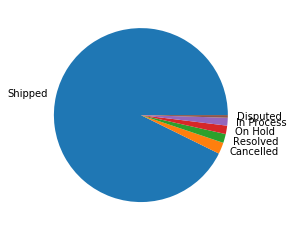

In [6]:
plt.pie(vehicle_sales['STATUS'].value_counts(), labels=p.index)


#### Q2. Who is the number one buyer (customer) of each type of vehicles.

In [38]:
vehicle_sales.groupby('PRODUCTLINE')['CUSTOMERNAME'].value_counts()

PRODUCTLINE   CUSTOMERNAME                
Classic Cars  Euro Shopping Channel           106
              Mini Gifts Distributors Ltd.     67
              Muscle Machine Inc               34
              Vida Sport, Ltd                  31
              Anna's Decorations, Ltd          24
                                             ... 
Vintage Cars  Cruz & Sons Co.                   1
              Heintze Collectables              1
              La Corne D'abondance, Co.         1
              Microscale Inc.                   1
              Motor Mint Distributors Inc.      1
Name: CUSTOMERNAME, Length: 399, dtype: int64

#### Q3. What is the average sale of each product of each vehicle type.

In [81]:
vehicle_sales.groupby(['PRODUCTLINE','PRODUCTCODE'])['SALES'].mean()

PRODUCTLINE   PRODUCTCODE
Classic Cars  S10_1949       6824.036786
              S10_4757       4188.656667
              S10_4962       4555.291429
              S12_1099       5487.080400
              S12_1108       6484.050769
                                ...     
Vintage Cars  S24_3816       2698.870000
              S24_3969       1508.257273
              S24_4258       3626.116923
              S32_4289       2554.284167
              S50_1341       1931.459615
Name: SALES, Length: 109, dtype: float64

#### Q4. Which countries are the top three buyers of vehicles.

In [9]:
h = pd.DataFrame(vehicle_sales.groupby('COUNTRY')['SALES'].sum())
h.nlargest(3,'SALES')

,SALES
COUNTRY,
USA,3627982.83
Spain,1215686.92
France,1110916.52


#### Q5. Plot quarterly sales of each type of vehicles.

In [25]:
vehicle_sales.groupby('PRODUCTLINE').aggregate(['min', np.median, max])

QUANTITYORDERED            SELLINGPRICE                 \
                             min median max          min  median    max   
PRODUCTLINE                                                               
Classic Cars                  10   35.0  97        28.29  100.00  100.0   
Motorcycles                   20   35.0  66        32.59   93.90  100.0   
Planes                        11   34.0  85        40.22   83.22  100.0   
Ships                         20   34.5  55        43.68   87.61  100.0   
Trains                        20   35.0  51        36.07   67.73  100.0   
Trucks and Buses              11   36.0  70        35.71  100.00  100.0   
Vintage Cars                   6   34.0  76        26.88   86.01  100.0   

                    SALES                     ACTUALPRICE              
                      min    median       max         min median  max  
PRODUCTLINE                                                            
Classic Cars       640.05  3761.370  12001.00          35    124  214  
Motorcycles        651.80  3127.820  11886.60          40     95  193  
Planes             875.91  2841.805  10066.60          49     80  157  
Ships             1089.36  2884.925   6960.48          54     86  122  
Trains             972.40  2445.600   8977.05          58     62  100  
Trucks and Buses   482.13  3449.400   8844.12          54    116  136  
Vintage Cars       541.14  2795.270  14082.80          33     88  170

#### Q6. What is the distribution of Deal Size.

([<matplotlib.patches.Wedge at 0x1ac0ace4508>,
 [Text(0.033658592389843776, 1.0994849244797922, 'Medium'),
  Text(-0.22427052556836177, -1.076894949083378, 'Small'),
  Text(1.083253085847632, -0.19121389071294728, 'Large')])

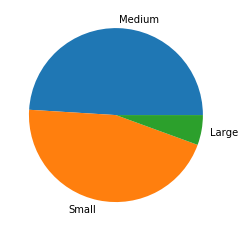

In [39]:
X = vehicle_sales['DEALSIZE'].value_counts()
X
plt.pie(vehicle_sales['DEALSIZE'].value_counts(),labels=X.index)

#### Q7. Calculate whether you earned profit or loss over sale of each vehicle type.

#### Q8. Which city ordered how much quantity of each vehicle type.

In [90]:
vehicle_sales.groupby(['CITY','PRODUCTLINE'])['QUANTITYORDERED'].sum()


CITY          PRODUCTLINE     
Aaarhus       Classic Cars        670
              Ships                23
              Trains               96
              Trucks and Buses     73
              Vintage Cars         20
                                 ... 
White Plains  Motorcycles         159
              Planes              292
              Trains               33
              Trucks and Buses    165
              Vintage Cars         93
Name: QUANTITYORDERED, Length: 334, dtype: int64